In [1]:
import csv

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/Users/jaycohen/Documents/NYCDSA/Machine_Learning_Project/HousingML/train.csv')

In [6]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
fencedf = data.loc[:,['Id','Fence','SalePrice']]

In [11]:
fencedf

,Id,Fence,SalePrice
0,1,NaN,208500
1,2,NaN,181500
2,3,NaN,223500
3,4,NaN,140000
4,5,NaN,250000
...,...,...,...
1455,1456,NaN,175000
1456,1457,MnPrv,210000
1457,1458,GdPrv,266500
1458,1459,NaN,142125


In [12]:
fencedf = fencedf.sort_values(by='Fence')

In [13]:
fencedf

,Id,Fence,SalePrice
741,742,GdPrv,142000
863,864,GdPrv,132500
862,863,GdPrv,152000
860,861,GdPrv,189950
842,843,GdPrv,174900
...,...,...,...
1453,1454,NaN,84500
1454,1455,NaN,185000
1455,1456,NaN,175000
1458,1459,NaN,142125


In [14]:
sortedbyfence = fencedf.groupby(by='Fence')

In [19]:
fencedf = fencedf.fillna(value='ABC')

In [21]:
sortedbyfence = fencedf.groupby(by='Fence')

In [22]:
sortedbyfence.mean()

,Id,SalePrice
Fence,,
ABC,731.872774,187596.837998
GdPrv,752.372881,178927.457627
GdWo,750.203704,140379.314815
MnPrv,704.286624,148751.089172
MnWw,743.454545,134286.363636


In [23]:
sortedbyfence.min()

,Id,SalePrice
Fence,,
ABC,1,35311
GdPrv,16,108000
GdWo,15,34900
MnPrv,6,40000
MnWw,130,110000


In [24]:
sortedbyfence.max()

,Id,SalePrice
Fence,,
ABC,1460,755000
GdPrv,1458,475000
GdWo,1449,381000
MnPrv,1457,745000
MnWw,1393,187000


In [2]:
import csv
import pandas as pd
import numpy as np

In [2]:
newdata = pd.read_csv('/Users/jaycohen/Documents/NYCDSA/Machine_Learning_Project/HousingML/train05-23.csv')

In [3]:
newdata

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_Age,Remod_Age,Garage_Age
0,0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,...,0,0,2,2008,WD,Normal,208500,7,7,7.0
1,1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,...,0,0,5,2007,WD,Normal,181500,34,34,34.0
2,2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,...,0,0,9,2008,WD,Normal,223500,9,8,9.0
3,3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,...,0,0,2,2006,WD,Abnorml,140000,95,40,12.0
4,4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,...,0,0,12,2008,WD,Normal,250000,10,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,...,0,0,8,2007,WD,Normal,175000,11,10,11.0
1447,1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,...,0,0,2,2010,WD,Normal,210000,32,22,32.0
1448,1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,...,0,2500,5,2010,WD,Normal,266500,69,4,69.0
1449,1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,...,0,0,4,2010,WD,Normal,142125,60,14,60.0


In [4]:
newdata = newdata.drop('Unnamed: 0', axis=1)

In [5]:
newdata = newdata.drop('GarageYrBlt', axis=1)

In [20]:
newdata.columns[newdata.isna().any()].tolist()

['GarageYrBlt']

In [6]:
houses = newdata

houses["MSSubClass"] = houses["MSSubClass"].apply(str)

houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
# houses.loc[(houses["Fireplaces"] == 1) & (~pd.isna(houses["FireplaceQu"])), ["Fireplaces", "FireplaceQu"]]
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)

# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]


In [7]:
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_Age,Remod_Age,Garage_Age
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,2,2008,WD,Normal,208500,7,7,7.0
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,5,2007,WD,Normal,181500,34,34,34.0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,9,2008,WD,Normal,223500,9,8,9.0
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,2,2006,WD,Abnorml,140000,95,40,12.0
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,12,2008,WD,Normal,250000,10,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,8,2007,WD,Normal,175000,11,10,11.0
1447,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,2,2010,WD,Normal,210000,32,22,32.0
1448,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,2500,5,2010,WD,Normal,266500,69,4,69.0
1449,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,4,2010,WD,Normal,142125,60,14,60.0


In [8]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
randomForest = ensemble.RandomForestRegressor()

In [12]:
print(houses.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Misc

In [27]:
use_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'House_Age', 'Remod_Age', 'Garage_Age']
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
randomForest.set_params(random_state=42, n_estimators=1000, max_features=25)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [29]:
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [30]:
randomForest.score(X_train, y_train)

0.9787417014723381

In [31]:
randomForest.score(X_test, y_test)

0.9089943761530407

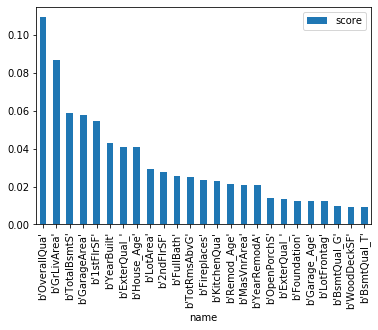

In [32]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:25].plot.bar(x='name', y='score')

In [8]:
import matplotlib.pyplot as plt

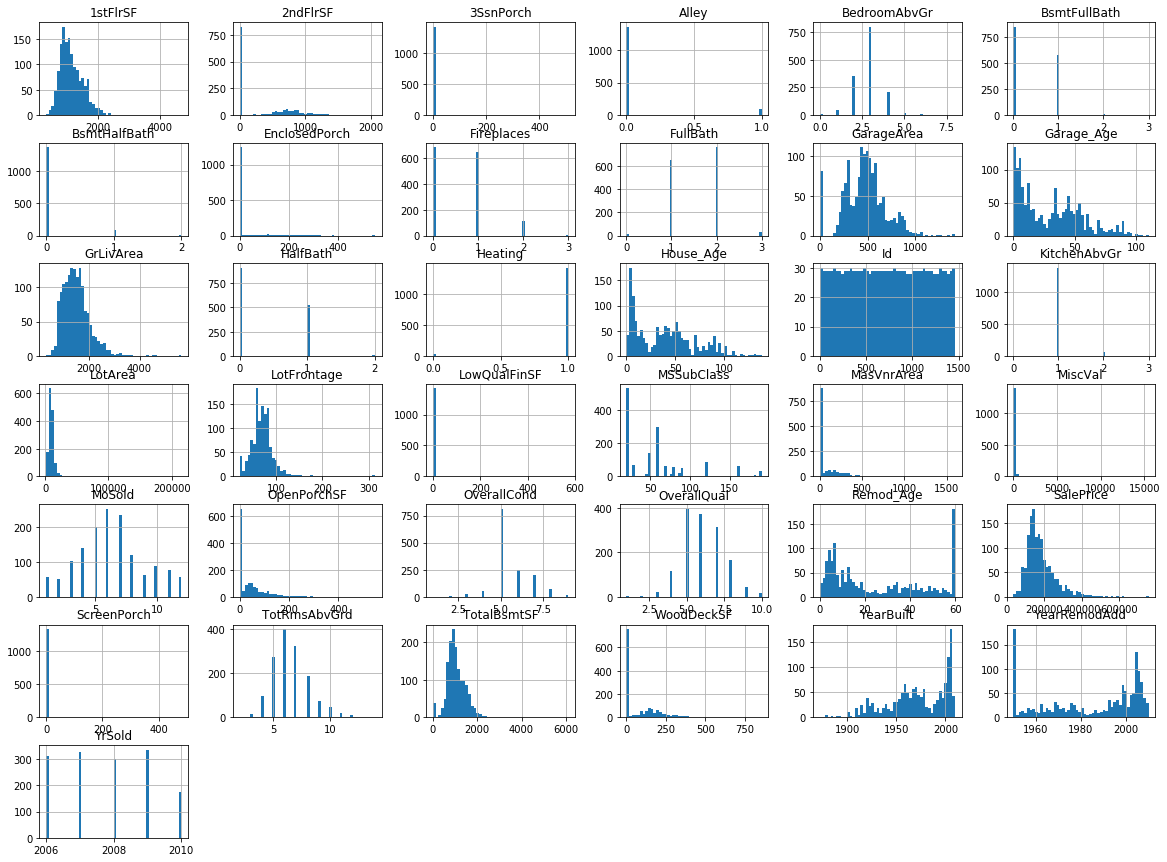

In [6]:
newdata.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
np.histogram(newdata.GrLivArea, bins=30)

(array([  3,  11,  93, 159, 191, 201, 202, 207, 124,  93,  54,  39,  31,
         17,   8,   4,   5,   3,   2,   0,   0,   0,   1,   1,   1,   0,
          0,   0,   0,   1]),
 array([ 334.        ,  510.93333333,  687.86666667,  864.8       ,
        1041.73333333, 1218.66666667, 1395.6       , 1572.53333333,
        1749.46666667, 1926.4       , 2103.33333333, 2280.26666667,
        2457.2       , 2634.13333333, 2811.06666667, 2988.        ,
        3164.93333333, 3341.86666667, 3518.8       , 3695.73333333,
        3872.66666667, 4049.6       , 4226.53333333, 4403.46666667,
        4580.4       , 4757.33333333, 4934.26666667, 5111.2       ,
        5288.13333333, 5465.06666667, 5642.        ]))

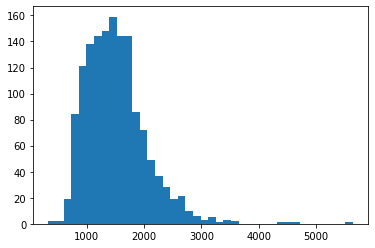

In [14]:
plt.hist(newdata.GrLivArea, bins=40)
plt.show()

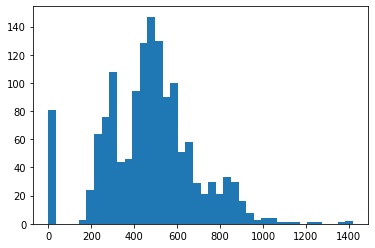

In [15]:
plt.hist(newdata.GarageArea, bins=40)
plt.show()

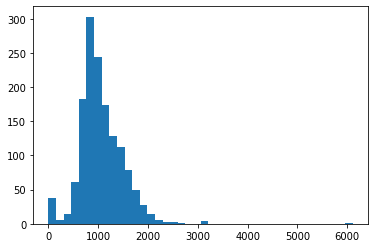

In [16]:
plt.hist(newdata.TotalBsmtSF, bins=40)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None, "display.max_rows", None)

In [2]:
houses = pd.read_csv('/Users/jaycohen/Documents/NYCDSA/Machine_Learning_Housing_Project/HousingML/train05-23.csv')

In [3]:
houses = houses.drop('Unnamed: 0', axis=1)
houses = houses.drop('GarageYrBlt', axis=1)

In [4]:
houses["MSSubClass"] = houses["MSSubClass"].apply(str)

houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)

houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)

houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)

houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

In [5]:
print(houses.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold',

In [5]:
houses['log_SalePrice']=np.log(houses['SalePrice'])
houses['log_LotArea']=np.log(houses['LotArea'])
houses['log_GrLivArea']=np.log(houses['GrLivArea'])

In [6]:
houses = houses.drop('1stFlrSF', axis=1)
houses = houses.drop('2ndFlrSF', axis=1)

In [7]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [8]:
lasso.set_params(alpha=1, normalize=True)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [9]:
for col in ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition']:
    houses[col] = houses[col].astype('category')

In [10]:
featurestoselect = houses[['GarageArea','TotalBsmtSF','MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'House_Age', 'Remod_Age', 'Garage_Age', 'log_LotArea', 'log_GrLivArea']]
targetlogsaleprice = houses.log_SalePrice

In [11]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [12]:
X = pd.get_dummies(featurestoselect, drop_first=True, dummy_na=True)
y = targetlogsaleprice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
ridge.set_params(alpha=0, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.944547249464281

In [19]:
ridge.score(X_test, y_test)

-3305260493877720.5

In [17]:
alphas = np.linspace(.00001, 5, 1000)
ridge.set_params(normalize=True)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
        test_scores.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  
coefs.head()

,GarageArea,TotalBsmtSF,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,House_Age,Remod_Age,Garage_Age,log_LotArea,log_GrLivArea,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_NoSeWa,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_1.0,Heating_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,MoSold_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0.000010,0.000146,0.000109,1.691339e-04,0.042350,0.040134,0.000946,0.000308,0.000066,0.010582,-0.006743,0.001785,-0.001481,0.008273,0.008442,-0.007755,0.014094,0.000077,0.045543,0.018848,0.021732,0.027094,-0.003381,-0.042086,0.017104,0.001520,0.020152,0.0,0.0

In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score
ols = linear_model.LinearRegression() 

In [20]:
featurestoselect2 = houses[['log_GrLivArea', 'log_LotArea', 'OverallQual', 'ExterQual', 'KitchenQual', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', 'GarageArea', 'YrSold', 'House_Age', 'SaleType']]
targetlogsaleprice2 = houses.log_SalePrice

In [21]:
X2 = pd.get_dummies(featurestoselect2, drop_first=True, dummy_na=True)
y2 = targetlogsaleprice2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [22]:
ols.fit(X2_train, y2_train)
ols.score(X2_train, y2_train)

0.8444077303302313

In [23]:
ols.score(X2_test, y2_test)

0.8495595106524193

In [27]:
coeff_df = pd.DataFrame(ols.coef_, X2.columns, columns=['Coefficient'])
coeff_df

,Coefficient
log_GrLivArea,0.394809
log_LotArea,0.120122
OverallQual,0.088565
ExterQual,0.019040
KitchenQual,0.066952
BedroomAbvGr,-0.012403
FullBath,-0.011260
TotalBsmtSF,0.000059
GarageArea,0.000158
YrSold,0.000113


In [5]:
data = pd.read_csv('/Users/jaycohen/Documents/NYCDSA/Machine_Learning_Housing_Project/HousingML/train05-23.csv')

In [7]:
import seaborn as sns

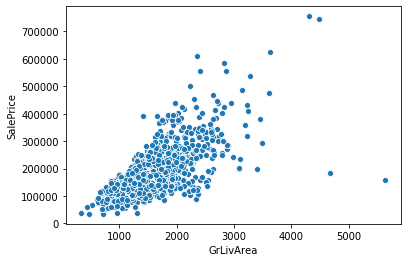

In [9]:
sns.scatterplot(data['GrLivArea'],data['SalePrice'])